## Web scraping and analysis

I scrapped British Airways review using the `BeautifulSoup` library. I cleaned the data and saved the clean dataset as a  `.csv` file.

### Scraping data from Skytrax
If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see the data.

### Task 1
#### Web scraping

---

In [1]:
# import required libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

#initialize a list to hold the scrapped result
reviews = []

# scrap the first 20 pages
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    elements = parsed_content.find_all("div", {"class": "text_content"})
    for element in elements:
        reviews.append(element.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
type(reviews)

list

In [4]:
#convert list data to dataframe

df = pd.DataFrame(reviews, columns=['reviews'])
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [5]:
#Removing unwanted text
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)

df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,Online check in worked fine. Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Not Verified | Paid a quick visit to Nice yest...


In [6]:
#Removing unwanted text
df.replace(re.compile(r'\s*Not Verified \|\s*'), '', inplace=True)

df.head()

,reviews
0,Top Ten REASONS to not use British Airways To ...
1,Easy check in on the way to Heathrow. The flig...
2,Online check in worked fine. Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Paid a quick visit to Nice yesterday from Heat...


In [ ]:
df.to_csv("data/clean_BA_reviews.csv", index=False)

### Task 2
#### Analysis

---

In [7]:
# import libraries

from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
# read dataset to dataframe

df = pd.read_csv("data/clean_BA_reviews.csv")
df.head()

,reviews
0,Top Ten REASONS to not use British Airways To ...
1,Easy check in on the way to Heathrow. The flig...
2,Online check in worked fine. Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...
4,Paid a quick visit to Nice yesterday from Heat...


In [10]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# create 'sentiment' column
df['sentiment'] = df['reviews'].apply(lambda review: sentiment_analyzer.polarity_scores(review)['compound'])

df.head()

,reviews,sentiment
0,Top Ten REASONS to not use British Airways To ...,-0.9296
1,Easy check in on the way to Heathrow. The flig...,-0.0516
2,Online check in worked fine. Quick security ch...,0.8479
3,. The BA first lounge at Terminal 5 was a zoo...,-0.1289
4,Paid a quick visit to Nice yesterday from Heat...,0.9763


In [11]:
# Create column 'sentiment_type' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'sentiment' column

df['sentiment_type'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')
df.head()

,reviews,sentiment,sentiment_type
0,Top Ten REASONS to not use British Airways To ...,-0.9296,negative
1,Easy check in on the way to Heathrow. The flig...,-0.0516,negative
2,Online check in worked fine. Quick security ch...,0.8479,positive
3,. The BA first lounge at Terminal 5 was a zoo...,-0.1289,negative
4,Paid a quick visit to Nice yesterday from Heat...,0.9763,positive


In [12]:
df.sentiment_type.value_counts()

positive    1068
negative     926
neutral        6
Name: sentiment_type, dtype: int64

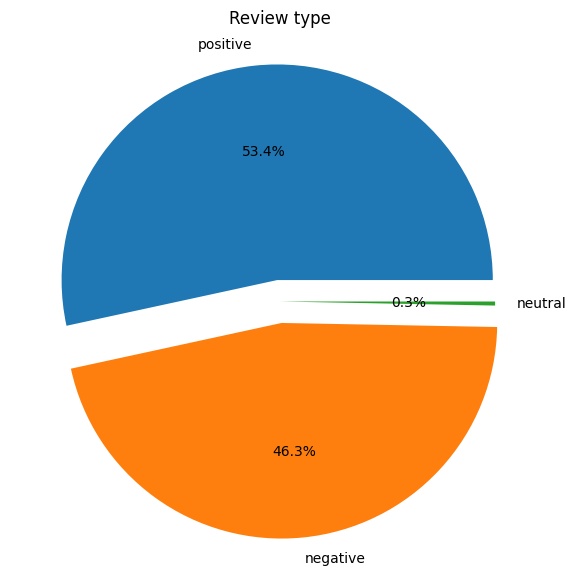

In [13]:
# percentage of each type of sentiment score

sentiment_type_percentages = df['sentiment_type'].value_counts(normalize=True) * 100

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(sentiment_type_percentages, labels=sentiment_type_percentages.index, explode=[0.1, 0.1, 0], autopct='%1.1f%%')

plt.title("Review type")
# show plot
plt.show()

There are more positive review than negative reviews. Positive reviews make up 53.4% of the total reviews.

In [15]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

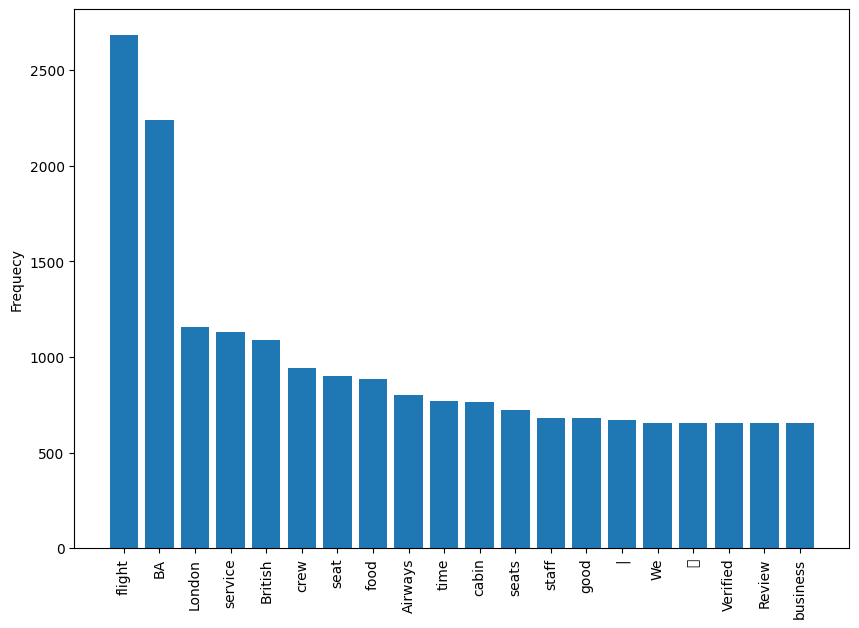

In [21]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = df['reviews']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the bar chart
plt.figure(figsize =(10, 7))
plt.bar(labels, values)
plt.ylabel("Frequecy")
plt.xticks(rotation=90)

#Display the plot
plt.show()

#plt.savefig("output_img\WordFreq.png", format="png", dpi=800)

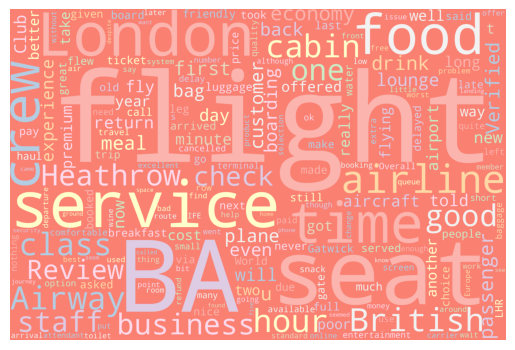

In [17]:
# Import the necessary libraries
from wordcloud import WordCloud

text = " ".join(cat for cat in df.reviews)

# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    ).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Main topics
From the wordcloud above, it can be clearly seen that words like flight, BA, seat, food, London, service, time are the topics passengers talked about most.